In [1]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading value_per_acre.csv file from data folder
value_per_acre_df= pd.read_csv("./value_per_acre.csv",
                               parse_dates= True)
value_per_acre_df.tail()

,Unnamed: 0,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
43,2017,3170,NaN,7720,2730,11630,2070,7630,7960,6940,3430,NaN,3570,7210,6300,7440,2010,4140,2700,7630,7050,7630,4580,4920,2900,3560,1010,4430,5829,7630,13600,1560,2740,4090,1890,6150,1590,2920,6470,7630,2700,3200,3730,1850,3690,7630,4730,2660,3250,4870,1460
44,2018,3300,NaN,7610,2780,12170,2100,7650,8120,7040,3430,NaN,3740,7280,6210,7290,2060,4250,2790,7650,7280,7650,4510,4950,3000,3490,1020,4380,5722,7650,13700,1580,2800,4130,1870,6320,1630,3000,6890,7650,2790,3120,3830,1890,3830,7650,4760,2630,3250,4740,1490
45,2019,3430,NaN,7600,2850,12830,2160,7900,8600,7190,3210,NaN,3930,7300,6210,7260,2160,4300,2880,7900,7370,7900,4500,4810,3080,3490,1040,4390,5722,7900,13700,1550,2810,4180,1920,6400,1670,3080,7030,7900,2830,3130,3910,1930,3970,7900,4720,2630,3280,4850,1520
46,2020,3500,NaN,7650,2880,12900,2200,7900,8600,7190,3320,NaN,4070,7300,6210,7170,2080,4400,2930,7900,7380,7900,4480,4800,3100,3530,1030,4360,5722,7900,13800,1600,2800,4180,1930,6460,1690,3120,7100,7900,2830,3030,3990,2030,4040,7900,4680,2610,3270,4770,1540
47,2021,3550,NaN,7700,2930,13860,2240,8770,8600,7300,3480,NaN,4450,7900,6800,7810,2370,4510,2980,8770,7960,8770,4700,5270,3150,3810,1050,4960,5616,8770,14800,1660,2910,4290,2060,6800,1810,3310,7600,8770,2900,3390,4130,2150,4190,8770,4790,2700,3330,5280,1600


In [5]:
# Renaming unnamed column to "Year"
value_per_acre_df=value_per_acre_df.rename(columns={"Unnamed: 0": "Year"})

In [6]:
# Selecting the historcial prices of the farmland in California over the last 20 years
california_df= value_per_acre_df.loc[26:,["Year", "California"]]
california_df.head()

,Year,California
26,2000,5960
27,2001,5870
28,2002,5730
29,2003,5920
30,2004,6020


In [7]:
california_df["Year"] = pd.to_datetime(california_df['Year'], format="%Y")

In [8]:
california_df.dtypes

Year          datetime64[ns]
California             int64
dtype: object

In [9]:
# Rename the columns to the Prophet model syntax 
california_df = california_df.rename(columns={"Year":"ds", "California":"y"})

# Review the DataFrame
california_df.head()

,ds,y
26,2000-01-01,5960
27,2001-01-01,5870
28,2002-01-01,5730
29,2003-01-01,5920
30,2004-01-01,6020


In [10]:
# Creating a Prophet model for the price prediction of the farmland in California
model = Prophet()

In [11]:
# Fitting the Prophet model
model.fit(california_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


In [12]:
# Forecast 15 years of farmland prices in California
future_farmland_prices_california = model.make_future_dataframe(periods=15, freq="Y")

# Display the last five rows of the DataFrame
future_farmland_prices_california.tail()

,ds
32,2031-12-31
33,2032-12-31
34,2033-12-31
35,2034-12-31
36,2035-12-31


In [13]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices_california = model.predict(future_farmland_prices_california)

# Display the first five rows of the forecast_canada DataFrame
forecast_farmland_prices_california.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,2084.026720,4693.369006,6439.915401,2084.026720,2084.026720,3498.228468,3498.228468,3498.228468,3498.228468,3498.228468,3498.228468,0.0,0.0,0.0,5582.255188
1,2001-01-01,2445.815339,5273.616016,6994.432741,2445.815339,2445.815339,3718.188814,3718.188814,3718.188814,3718.188814,3718.188814,3718.188814,0.0,0.0,0.0,6164.004153
2,2002-01-01,2806.615465,5586.974250,7228.384951,2806.615465,2806.615465,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,3607.166985,0.0,0.0,0.0,6413.782450
3,2003-01-01,3167.415590,5831.483523,7589.725562,3167.415590,3167.415590,3533.822536,3533.822536,3533.822536,3533.822536,3533.822536,3533.822536,0.0,0.0,0.0,6701.238127
4,2004-01-01,3528.215716,6178.582793,7947.385781,3528.215716,3528.215716,3498.228468,3498.228468,3498.228468,3498.228468,3498.228468,3498.228468,0.0,0.0,0.0,7026.444184


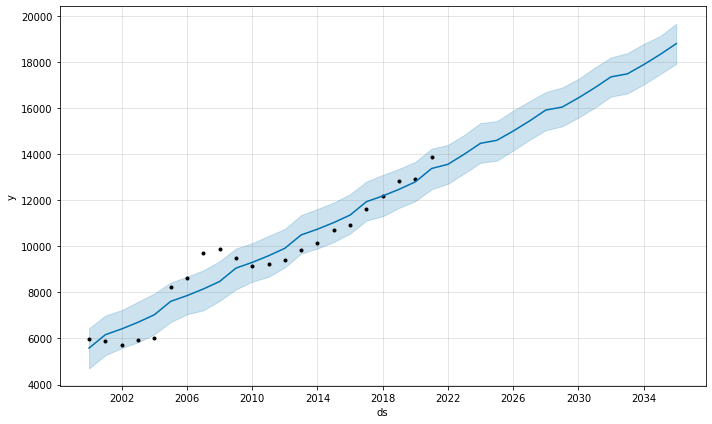

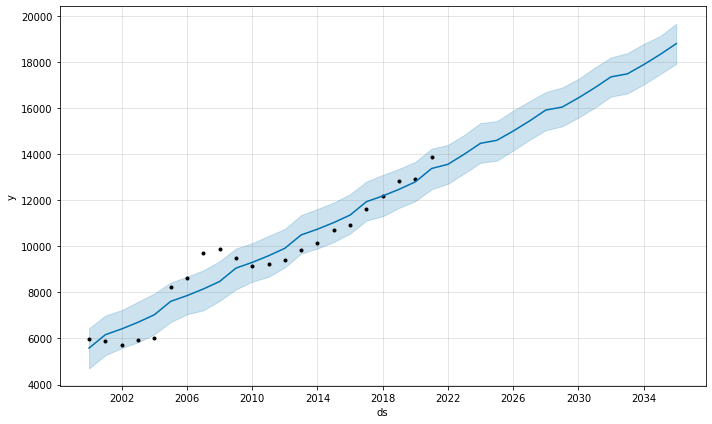

In [16]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices_california)

In [27]:
# Setting the index in the forecast_farmland_prices_california DataFrame to the ds datetime column 
forecast_farmland_prices_california = forecast_farmland_prices_california.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices_california.tail()




,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2031-12-31,13619.902692,16499.523787,18195.575116,13618.639415,13621.250552,3732.437426,3732.437426,3732.437426,3732.437426,3732.437426,3732.437426,0.0,0.0,0.0,17352.340118
2032-12-31,13981.021433,16626.855261,18377.192927,13979.549730,13982.584953,3500.389785,3500.389785,3500.389785,3500.389785,3500.389785,3500.389785,0.0,0.0,0.0,17481.411218
2033-12-31,14341.153510,17020.684251,18780.270933,14339.470234,14342.899817,3540.243518,3540.243518,3540.243518,3540.243518,3540.243518,3540.243518,0.0,0.0,0.0,17881.397028
2034-12-31,14701.285587,17466.949718,19115.593347,14699.402771,14703.226236,3617.658860,3617.658860,3617.658860,3617.658860,3617.658860,3617.658860,0.0,0.0,0.0,18318.944448
2035-12-31,15061.417665,17912.190313,19661.676355,15059.352612,15063.574538,3732.437426,3732.437426,3732.437426,3732.437426,3732.437426,3732.437426,0.0,0.0,0.0,18793.855091


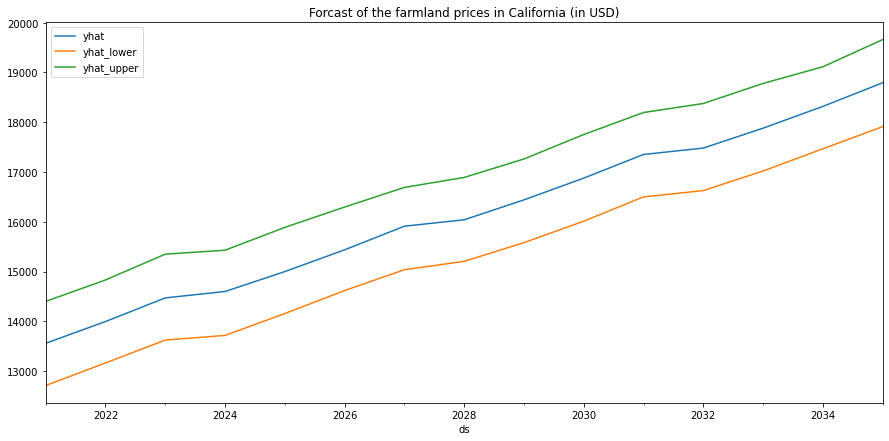

In [28]:
# Plot predictions for our forecast_famrland_prices_california DataFrame for the 15 year period 
forecast_farmland_prices_california[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-15:,:].plot(title= "Forcast of the farmland prices in California (in USD)", figsize=(15,7))



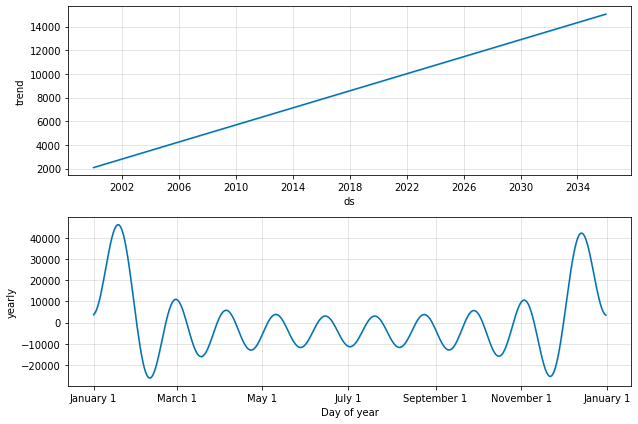

In [23]:
# Reseting the index in the forecast_farmland_prices_california DataFrame
forecast_farmland_prices_california = forecast_farmland_prices_california.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices_california)